In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
df = pd.read_csv("aircompressor.csv")
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,Stable


In [4]:
# total number of rows and columns
df.shape    # 1000 records, 26 features

(1000, 26)

In [5]:
# count of non null values
df.count()

id                     1000
rpm                    1000
motor_power            1000
torque                 1000
outlet_pressure_bar    1000
air_flow               1000
noise_db               1000
outlet_temp            1000
wpump_outlet_press     1000
water_inlet_temp       1000
water_outlet_temp      1000
wpump_power            1000
water_flow             1000
oilpump_power          1000
oil_tank_temp          1000
gaccx                  1000
gaccy                  1000
gaccz                  1000
haccx                  1000
haccy                  1000
haccz                  1000
bearings               1000
wpump                  1000
radiator               1000
exvalve                1000
acmotor                1000
dtype: int64

In [6]:
# count of null values
df.isna().sum()

id                     0
rpm                    0
motor_power            0
torque                 0
outlet_pressure_bar    0
air_flow               0
noise_db               0
outlet_temp            0
wpump_outlet_press     0
water_inlet_temp       0
water_outlet_temp      0
wpump_power            0
water_flow             0
oilpump_power          0
oil_tank_temp          0
gaccx                  0
gaccy                  0
gaccz                  0
haccx                  0
haccy                  0
haccz                  0
bearings               0
wpump                  0
radiator               0
exvalve                0
acmotor                0
dtype: int64

In [7]:
# count of each bearings status as percentage
df['bearings'].value_counts(normalize=True) * 100


bearings
0    80.0
1    20.0
Name: proportion, dtype: float64

In [8]:
# Separate healthy and faulty data
healthy_df = df[df['bearings'] == 0]
faulty_df  = df[df['bearings'] == 1]


In [9]:
healthy_df.describe()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000
mean,510.500000,1499.476250,6958.695695,48.928602,4.027931,717.188470,52.006550,120.245751,2.819740,84.316535,...,0.601759,0.349689,3.886562,1.101274,1.349646,3.476601,0.0,0.250000,0.250000,0.250000
std,289.375055,707.853044,4239.238109,18.286715,1.821015,438.814968,7.275859,19.361857,0.452049,18.917402,...,0.058697,0.040567,1.551168,0.058447,0.041168,0.789215,0.0,0.433284,0.433284,0.433284
min,1.000000,480.000000,1403.720659,13.222197,1.000000,95.098952,39.879017,76.902822,1.871158,43.166392,...,0.540045,0.274650,1.730301,1.040467,1.274076,2.329267,0.0,0.000000,0.000000,0.000000
25%,270.750000,988.750000,3559.437042,33.773217,2.450000,302.307224,45.673130,106.091497,2.467822,70.191854,...,0.558074,0.316955,2.576739,1.057703,1.318261,2.803695,0.0,0.000000,0.000000,0.000000
50%,520.500000,1500.000000,5874.425203,48.555078,4.018000,600.147789,51.514920,119.374906,2.800045,83.002049,...,0.576315,0.349673,3.589754,1.075518,1.347606,3.321946,0.0,0.000000,0.000000,0.000000
75%,760.250000,2009.250000,9683.007776,63.292138,5.581000,1102.464872,58.100072,134.185660,3.104829,96.766085,...,0.614734,0.375156,5.064906,1.114462,1.375091,4.060988,0.0,0.250000,0.250000,0.250000
max,1000.000000,2520.000000,19454.559080,93.540405,7.599000,1537.992113,66.714857,172.711382,4.295136,137.543531,...,0.726604,0.459811,8.222820,1.227134,1.461809,5.768995,0.0,1.000000,1.000000,1.000000


In [10]:
faulty_df.describe()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.0,200.0,200.0
mean,460.50000,1499.675000,7089.604074,50.216193,4.158520,904.615770,59.034408,113.292547,2.719087,77.842416,...,0.601910,0.349580,4.069113,1.101169,1.351627,3.568781,1.0,0.0,0.0,0.0
std,283.78853,708.771972,4396.676262,20.316411,2.022635,427.396203,8.572453,17.064747,0.460346,16.571029,...,0.058953,0.041166,1.824048,0.059092,0.039722,0.921231,0.0,0.0,0.0,0.0
min,41.00000,480.000000,1402.424603,13.368173,1.000000,298.881289,45.085252,78.293311,1.834533,43.471194,...,0.540993,0.282247,1.747986,1.039910,1.270696,2.341244,1.0,0.0,0.0,0.0
25%,250.75000,989.250000,3567.173049,33.729909,2.412500,594.997565,51.439148,100.139803,2.345413,64.864311,...,0.558160,0.314474,2.571272,1.057744,1.320295,2.796649,1.0,0.0,0.0,0.0
50%,460.50000,1499.500000,6138.073322,50.168882,4.096000,902.107044,58.233727,112.352950,2.634043,77.828789,...,0.578271,0.346948,3.652700,1.075155,1.351255,3.394338,1.0,0.0,0.0,0.0
75%,670.25000,2010.250000,9405.337057,65.942909,5.772250,1215.373055,66.637337,125.507428,3.042831,89.119574,...,0.615609,0.375627,5.300270,1.111629,1.375437,4.170371,1.0,0.0,0.0,0.0
max,880.00000,2519.000000,18127.866090,90.700542,8.664000,1539.911634,74.401986,147.434987,3.750219,113.628951,...,0.724442,0.450052,9.209166,1.225977,1.455228,6.107852,1.0,0.0,0.0,0.0


bearings
0    52.006550
1    59.034408
Name: noise_db, dtype: float64


<Axes: title={'center': 'noise_db'}, xlabel='bearings'>

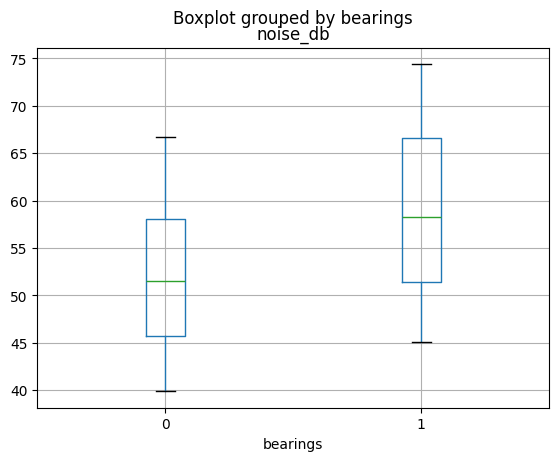

In [11]:
# Is the noise higher when bearings are bad?
# Compare average noise by bearings
print(df.groupby("bearings")["noise_db"].mean())
df.boxplot(column='noise_db', by='bearings')

Takeaway - When bearings are faulty, the noise level is generally higher.

bearings
0    46.251167
1    46.183647
Name: oil_tank_temp, dtype: float64


<Axes: title={'center': 'oil_tank_temp'}, xlabel='bearings'>

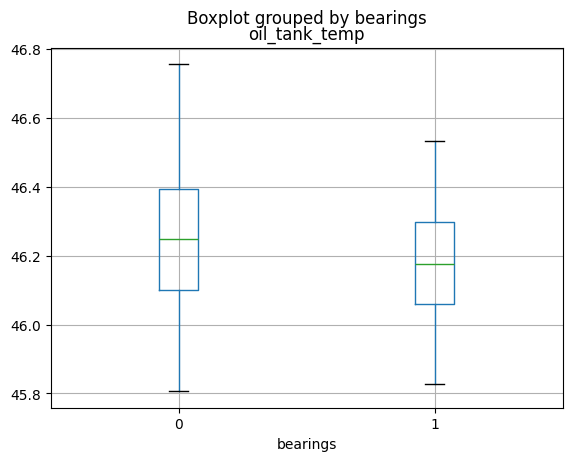

In [12]:
# Check temperature vs bearing condition
# bearings rely on lubrication
# Bad bearings - more friction - oil heats up
print(df.groupby('bearings')['oil_tank_temp'].mean())
df.boxplot(column='oil_tank_temp', by='bearings')

Takeaway - Oil Tank Temp is NOT a good indicator of bearing problems in this dataset.

Check Vibration magnitude

- Ground Acceleration (X, Y, Z)
- Head Acceleration (X, Y, Z)

In [13]:
df['ground_acc_mag'] = np.sqrt(
    df['gaccx']**2 +
    df['gaccy']**2 +
    df['gaccz']**2
)

In [14]:
df.groupby('bearings')['ground_acc_mag'].mean()

bearings
0    3.957795
1    4.139234
Name: ground_acc_mag, dtype: float64

Takeaway - Vibration is higher when bearings are faulty

In [15]:
# Does power increase when bearings are bad?
# Bad bearings → more friction → motor works harder
df.groupby('bearings')['motor_power'].mean()


bearings
0    6958.695695
1    7089.604074
Name: motor_power, dtype: float64

Takeaway - Motor power is higher when bearings are faulty

| Signal                 | When bearings are bad |
| ---------------------- | --------------------- |
| Noise dB               | Increases             |
| Vibration (ground acc) | Increases             |
| Motor Power            | Increases             |


In [16]:
features = [
    'noise_db',
    'ground_acc_mag',
    'motor_power'
]

X = df[features]
y = df['bearings']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [19]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.71      0.83       160
           1       0.46      1.00      0.63        40

    accuracy                           0.77       200
   macro avg       0.73      0.85      0.73       200
weighted avg       0.89      0.77      0.79       200



Bearings don’t fail suddenly.
They show warning signs before failure.

So we will:

- Take data before a failure

- Label it as “failure coming”

Mark a row as 1 if a bearing failure will happen in the next 5 rows

In [20]:
df['bearing_failure_soon'] = (
    df['bearings']
    .rolling(window=5)
    .max()
    .shift(-5)
)


In [21]:
df = df.dropna()

In [22]:
df['bearing_failure_soon'].value_counts()

bearing_failure_soon
0.0    775
1.0    220
Name: count, dtype: int64

Predictive labels look different from diagnostic labels

In [23]:
features = [
    'noise_db',
    'ground_acc_mag',
    'motor_power'
]

X = df[features]
y = df['bearing_failure_soon']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)


In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80       155
         1.0       0.45      0.89      0.60        44

    accuracy                           0.73       199
   macro avg       0.70      0.79      0.70       199
weighted avg       0.84      0.73      0.76       199



`Class 1 (failure soon)`

`Recall  = 0.89`

The model catches ~89% of upcoming bearing failures

Why precision for class 1 is still low (0.45)?

About half of the warnings are early or cautious.

## FFT Application

Why Fourier Transform in predictive maintenance?

Bearings don't just increase vibration, They vibrate at specific frequencies when damaged.

FFT helps answer: What frequencies are present in the vibration?

Next Steps :

- Take vibration magnitude

- Apply FFT

- Extract ONE simple frequency feature

- Add it to the model

What FFT gives you?

FFT converts Time signal to Frequency signal

Example:

- Time domain: vibration goes up and down
- Frequency domain : shows how fast it oscillates

Bad bearings usually show:
- Higher high-frequency energy

Apply FFT to the vibration signal

In [26]:
fft_vals = np.fft.fft(df['ground_acc_mag'].values)
fft_vals = np.abs(fft_vals)

Use only half the spectrum, FFT output is symmetric.

In [27]:
fft_vals = fft_vals[:len(fft_vals)//2]

Create one FFT-based feature

We'll create High-Frequency Energy

In [28]:
# Define frequency split
high_freq_energy = np.mean(fft_vals[int(len(fft_vals)*0.5):])

This roughly means:
- Look at the upper half of frequencies
- Average their energy

In [29]:
# Add it as a feature
df['fft_high_freq_energy'] = high_freq_energy

In [30]:
# check if feature makes sense
df.groupby('bearing_failure_soon')['fft_high_freq_energy'].mean()


bearing_failure_soon
0.0    7.479577
1.0    7.479577
Name: fft_high_freq_energy, dtype: float64

## PdM LESSON (Remember this)

FFT must be computed on small time windows, not on the full signal. 

Bearings degrade locally in time, not globally.

Let's do WINDOWED FFT

- Take small chunks of vibration
- Compute FFT per chunk
- Assign result to the last row of the chunk

choose window size - 20 rows

meaning: Look at vibration behavior over 20 time steps


In [31]:
# Loop over windows
window_size = 20

signal = df['ground_acc_mag'].values

for i in range(window_size, len(signal)):
    window = signal[i-window_size:i]

    fft_vals = np.abs(np.fft.fft(window))
    fft_vals = fft_vals[:len(fft_vals)//2]

    high_freq_energy = np.mean(fft_vals[len(fft_vals)//2:])

    df.loc[df.index[i], 'fft_high_freq_energy'] = high_freq_energy


In [32]:
# Remove rows without FFT values
df = df.dropna(subset=['fft_high_freq_energy'])

In [33]:
# Check if windowed FFT now makes sense
df.groupby('bearing_failure_soon')['fft_high_freq_energy'].mean()

bearing_failure_soon
0.0    2.485958
1.0    2.221819
Name: fft_high_freq_energy, dtype: float64

Why did you use FFT?

I compute FFT-based energy features on sliding windows of vibration magnitude to capture localized frequency-domain changes caused by bearing degradation.

What windowed FFT result is telling us?

High-frequency energy is slightly lower before failure.

## Important PdM lesson

Not every FFT feature increases before failure

### Spectral spread

In [34]:
# Create a new FFT feature
df['fft_spectral_spread'] = np.nan

for i in range(window_size, len(signal)):
    window = signal[i-window_size:i]

    fft_vals = np.abs(np.fft.fft(window))
    fft_vals = fft_vals[:len(fft_vals)//2]

    spread = np.std(fft_vals)

    df.loc[df.index[i], 'fft_spectral_spread'] = spread


In [35]:
# drop NaNs
df = df.dropna(subset=['fft_spectral_spread'])

In [36]:
df.groupby('bearing_failure_soon')['fft_spectral_spread'].mean()

bearing_failure_soon
0.0    22.843158
1.0    23.050434
Name: fft_spectral_spread, dtype: float64

Not all FFT energy features increase before failure. In my dataset, early bearing degradation caused energy concentration rather than broadband noise, so I used spectral spread to capture this effect.

In [37]:
df.groupby('bearing_failure_soon')['fft_spectral_spread'].mean()

bearing_failure_soon
0.0    22.843158
1.0    23.050434
Name: fft_spectral_spread, dtype: float64

Spectral spread is slightly higher before failure.

This tells us:

- The vibration spectrum becomes less stable

- Energy spreads irregularly across frequencies

- This is a classic early degradation signal

## Important PdM lesson (remember this)

Early failure signals are subtle, not dramatic

If the difference were huge:

- The bearing would already be failing
- Predictive value would be low


Next Steps

- Add this FFT feature to the predictive model
- See if it helps early warning
- Interpret the outcome

In [39]:
# Add FFT feature to predictive model
features = [
    'noise_db',
    'ground_acc_mag',
    'motor_power',
    'fft_spectral_spread'
]

X = df[features]
y = df['bearing_failure_soon']


In [40]:
# Train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)


In [41]:
# train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [42]:
# Evaluate
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80       151
         1.0       0.46      0.89      0.60        44

    accuracy                           0.74       195
   macro avg       0.71      0.79      0.70       195
weighted avg       0.84      0.74      0.76       195



### Compare Models (with and without FFT)

- Before FFT
    - Failure recall ~ 0.89
    - Accuracy ~ 0.73

- After adding FFT spectral spread
    - Failure recall ~ 0.89
    - Accuracy ~ 0.74

Very small change

What this means - FFT did not dramatically improve performance.

Why?

- Your original signals (noise, vibration magnitude, power) are already strong

- FFT adds secondary information

- With only 1000 rows, gains will be subtle

This is extremely common in real PdM projects.

This is actually a GOOD sign

Bad sign ❌:

- FFT suddenly boosts accuracy by 15%
(generally means data leakage or overfitting)

Good sign ✅:

- Small, stable improvement

- Failure recall remains high

- Model behavior stays consistent

### IMPORTANT PdM LESSON

FFT is not magic — it refines, not replaces, time-domain features